### ANÁLISIS CÉLULAS EN UN ESTUDIO DE CÁNCER

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [1]:
url = 'https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/cancer.csv'

In [6]:
df = pd.read_csv(url)
df.head()

,ID,Tipo,Radio,Textura,Perimetro,Area,Suavidad,Compacidad,Concavidad,Puntos_Conca,...,Radio_WM,Textura_WM,Perimetro_WM,Area_WM,Suavidad_WM,Compacidad_WM,Concavidad_WM,Puntos_Conca_WM,Simetria_WM,Fractal_WM
0,842302,M,1799,1038,1228,1001,1184,2776,3001,1471,...,2538,1733,1846,2019,1622,6656,7119,2654,4601,1189
1,842517,M,2057,1777,1329,1326,8474,7864,869,7017,...,2499,2341,1588,1956,1238,1866,2416,186,275,8902
2,84300903,M,1969,2125,130,1203,1096,1599,1974,1279,...,2357,2553,1525,1709,1444,4245,4504,243,3613,8758
3,84348301,M,1142,2038,7758,3861,1425,2839,2414,1052,...,1491,265,9887,5677,2098,8663,6869,2575,6638,173
4,84358402,M,2029,1434,1351,1297,1003,1328,198,1043,...,2254,1667,1522,1575,1374,205,4,1625,2364,7678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               569 non-null    int64 
 1   Tipo             569 non-null    object
 2   Radio            569 non-null    int64 
 3   Textura          569 non-null    int64 
 4   Perimetro        569 non-null    int64 
 5   Area             569 non-null    int64 
 6   Suavidad         569 non-null    int64 
 7   Compacidad       569 non-null    int64 
 8   Concavidad       569 non-null    int64 
 9   Puntos_Conca     569 non-null    int64 
 10  Simetria         569 non-null    int64 
 11  Fractal          569 non-null    int64 
 12  Radio_SE         569 non-null    int64 
 13  Textura_SE       569 non-null    int64 
 14  Perimetro_SE     569 non-null    int64 
 15  Area_SE          569 non-null    int64 
 16  Suavidad_SE      569 non-null    int64 
 17  Compacidad_SE    569 non-null    in

In [8]:
df.columns

Index(['ID', 'Tipo', 'Radio', 'Textura', 'Perimetro', 'Area', 'Suavidad',
       'Compacidad', 'Concavidad', 'Puntos_Conca', 'Simetria', 'Fractal',
       'Radio_SE', 'Textura_SE', 'Perimetro_SE', 'Area_SE', 'Suavidad_SE',
       'Compacidad_SE', 'Concavidad_SE', 'Puntos_Conca_SE', 'Simetria_SE',
       'Fractal_SE', 'Radio_WM', 'Textura_WM', 'Perimetro_WM', 'Area_WM',
       'Suavidad_WM', 'Compacidad_WM', 'Concavidad_WM', 'Puntos_Conca_WM',
       'Simetria_WM', 'Fractal_WM'],
      dtype='object')

In [23]:
df.columns[2:]

Index(['Radio', 'Textura', 'Perimetro', 'Area', 'Suavidad', 'Compacidad',
       'Concavidad', 'Puntos_Conca', 'Simetria', 'Fractal', 'Radio_SE',
       'Textura_SE', 'Perimetro_SE', 'Area_SE', 'Suavidad_SE', 'Compacidad_SE',
       'Concavidad_SE', 'Puntos_Conca_SE', 'Simetria_SE', 'Fractal_SE',
       'Radio_WM', 'Textura_WM', 'Perimetro_WM', 'Area_WM', 'Suavidad_WM',
       'Compacidad_WM', 'Concavidad_WM', 'Puntos_Conca_WM', 'Simetria_WM',
       'Fractal_WM'],
      dtype='object')

In [26]:
# Selecciono los valores numéricos del dataframe desde la segunda columna en
# adelante

x = df[df.columns[2:]].values.copy()
x.shape 


(569, 30)

In [27]:
type(x)

numpy.ndarray

In [28]:
df.Tipo

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Tipo, Length: 569, dtype: object

In [29]:
np.where ( df.Tipo == 'M' )[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,  41,  42,
        43,  44,  45,  47,  53,  54,  56,  57,  62,  64,  65,  70,  72,
        73,  75,  77,  78,  82,  83,  85,  86,  87,  91,  94,  95,  99,
       100, 105, 108, 117, 118, 119, 121, 122, 126, 127, 129, 131, 132,
       134, 135, 138, 141, 146, 156, 161, 162, 164, 167, 168, 171, 172,
       177, 180, 181, 182, 184, 186, 190, 193, 194, 196, 197, 198, 199,
       201, 202, 203, 205, 207, 210, 212, 213, 214, 215, 218, 219, 223,
       229, 230, 233, 236, 237, 239, 244, 250, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 272, 274, 277, 280,
       282, 283, 297, 300, 302, 317, 321, 323, 328, 329, 330, 335, 337,
       339, 343, 351, 352, 353, 365, 366, 368, 369, 370, 372, 373, 379,
       385, 389, 392, 393, 400, 408, 414, 417, 430, 432, 433, 43

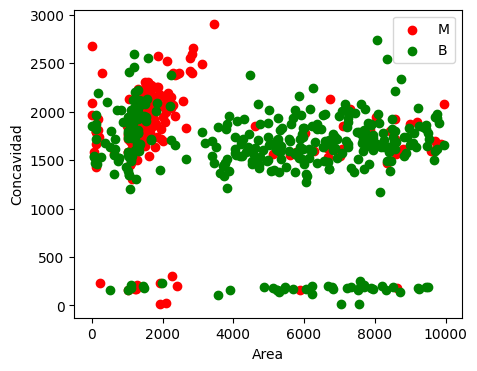

In [35]:
j, k = 5, 8 # selecciono las columnas a graficar
plt.figure(figsize= (5,4))
plt.scatter(x[np.where ( df.Tipo == 'M' )[0], j], 
            x[np.where ( df.Tipo == 'M' )[0], k],
            color = 'red', label='M')
plt.scatter(x[np.where ( df.Tipo == 'B' )[0], j], 
            x[np.where ( df.Tipo == 'B' )[0], k],
            color = 'green', label='B')
plt.legend()
plt.xlabel(df.columns[j])
plt.ylabel(df.columns[k])
plt.show()

In [39]:
len(df.columns[2:])

30

In [40]:
pca = PCA(n_components=30)
pca.fit(x)

PCA(n_components=30)

In [41]:
pca.components_

array([[-4.34153855e-02, -2.09121721e-02,  4.17614912e-01,
         4.31114136e-02,  3.56632219e-01,  2.97397684e-01,
         9.89783322e-02, -2.11800354e-01, -2.57094953e-02,
        -4.57797353e-02, -1.91772634e-01,  4.46849979e-02,
        -1.58265573e-01, -1.70478542e-01,  8.08206737e-03,
        -4.07846798e-02, -9.11671770e-02,  2.82511974e-01,
        -2.76060561e-02, -8.90920831e-02, -6.27696492e-02,
        -3.54354723e-02,  4.31449096e-01,  1.90841224e-01,
         3.24390245e-02, -1.03390830e-01, -1.15509369e-01,
         2.97279364e-01, -2.62013073e-02,  1.22575722e-01],
       [ 6.51509252e-02, -1.83127299e-02,  1.72629639e-01,
        -8.47141570e-02, -7.43084062e-01, -4.57714102e-02,
        -3.05284726e-02, -1.26831002e-01,  1.50859425e-02,
         9.16453258e-02, -7.36572140e-02, -8.60218490e-02,
        -5.68294487e-02, -1.10729617e-01,  7.36627520e-03,
         1.08238306e-01,  8.14048489e-02, -1.04999681e-01,
         6.14843354e-02,  1.18357447e-01, -3.24564952e-

In [44]:
varianza = pca.explained_variance_ratio_
varianza

array([0.18434389, 0.08397461, 0.07577384, 0.0598966 , 0.05352258,
       0.04960289, 0.04084368, 0.03987486, 0.03821162, 0.0361561 ,
       0.03370127, 0.03141122, 0.0278043 , 0.02688633, 0.02512869,
       0.0233177 , 0.02221116, 0.02136568, 0.01889989, 0.01851916,
       0.0171587 , 0.01583348, 0.0143772 , 0.01235857, 0.00936647,
       0.00624552, 0.00569741, 0.00444432, 0.00164894, 0.00142333])

In [47]:
np.cumsum(varianza)

array([0.18434389, 0.2683185 , 0.34409234, 0.40398894, 0.45751152,
       0.50711441, 0.54795809, 0.58783294, 0.62604457, 0.66220067,
       0.69590193, 0.72731315, 0.75511745, 0.78200378, 0.80713247,
       0.83045018, 0.85266133, 0.87402701, 0.8929269 , 0.91144606,
       0.92860476, 0.94443824, 0.95881544, 0.97117401, 0.98054048,
       0.986786  , 0.99248341, 0.99692773, 0.99857667, 1.        ])